In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

## EQUILIBRATION (MD)
Optimal starting temperature: 1.97

In [2]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/temperature.csv"
df1 = pd.read_csv(file,sep ="\t")
df1.head()


,#,BLOCK,ACTUAL_T,T_AVE,ERROR
0,NaN,1,1.09245,1.09245,0.000000
1,NaN,2,1.09286,1.09265,0.000145
2,NaN,3,1.08990,1.09173,0.000757
3,NaN,4,1.10153,1.09418,0.002195
4,NaN,5,1.08364,1.09207,0.002578


In [3]:
print(df1['T_AVE'][0]-df1['T_AVE'].tail(1))
print(df1['T_AVE'].tail(1))

9    0.00021
Name: T_AVE, dtype: float64
9    1.09224
Name: T_AVE, dtype: float64


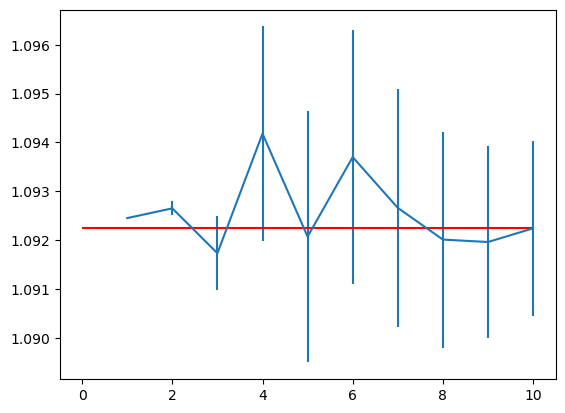

In [4]:
plt.errorbar(df1['BLOCK'],df1['T_AVE'],yerr=df1['ERROR'])
plt.hlines(df1['T_AVE'].tail(1),0,df1['BLOCK'].tail(1),color='red')
plt.show()

In [5]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/potential_energy.csv"
df = pd.read_csv(file,sep ="\t")
df.head()


,BLOCK,ACTUAL_PE,PE_AVE,ERROR
0,1,-5.46073,-5.46073,0.000000
1,2,-5.46075,-5.46074,0.000008
2,3,-5.45667,-5.45938,0.001108
3,4,-5.47356,-5.46293,0.003180
4,5,-5.44684,-5.45971,0.003842


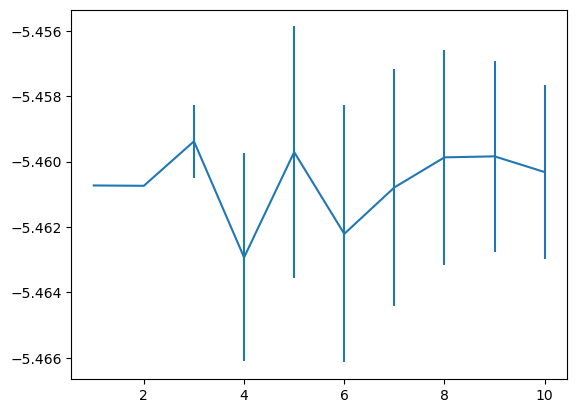

In [6]:
plt.errorbar(df['BLOCK'],df['PE_AVE'],yerr=df['ERROR'])

plt.show()

In [7]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/U_block_length.csv"
df2 = pd.read_csv(file,sep ="\t")
df2


,LENGTH,ERROR
0,3500,0.002665


In [8]:
BL = df2['LENGTH'][df2['ERROR']==df2['ERROR'].min()]
BL.tolist()
print('Optimal block length: ', BL)

Optimal block length:  0    3500
Name: LENGTH, dtype: int64


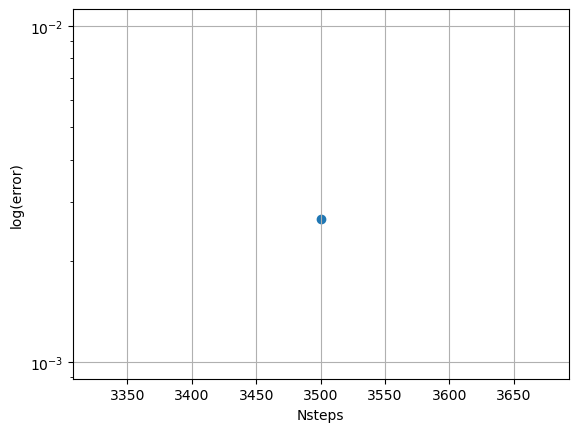

In [9]:
fig,ax = plt.subplots()
ax.scatter(df2['LENGTH'],df2['ERROR'])
ax.set_yscale('log')
plt.xlabel('Nsteps')
plt.ylabel('log(error)')
plt.grid()

In [30]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr.csv"
with open (file) as f:
    bin_size = f.readline()
    print(bin_size)

BIN SIZE	0.0256496



In [31]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr.csv"
df = pd.read_csv(file,sep ="\t", skiprows=1,skip_blank_lines = False)
df.head()

,BIN,DISTANCE,AVE_GOFR,ERROR
0,0.0,0.025650,0.0,0.0
1,1.0,0.051299,0.0,0.0
2,2.0,0.076949,0.0,0.0
3,3.0,0.102599,0.0,0.0
4,4.0,0.128248,0.0,0.0


In [32]:
T=1.1

nan_rows = df[df.isnull().all(axis=1)].index

# Add start/end points for slicing
split_points = [-1] + list(nan_rows) + [len(df)]

# Slice the DataFrame into blocks
histograms = []
for i in range(len(split_points) - 1):
    start = split_points[i] + 1
    end = split_points[i + 1]
    block = df.iloc[start:end].reset_index(drop=True)
    if not block.empty:
        histograms.append(block)

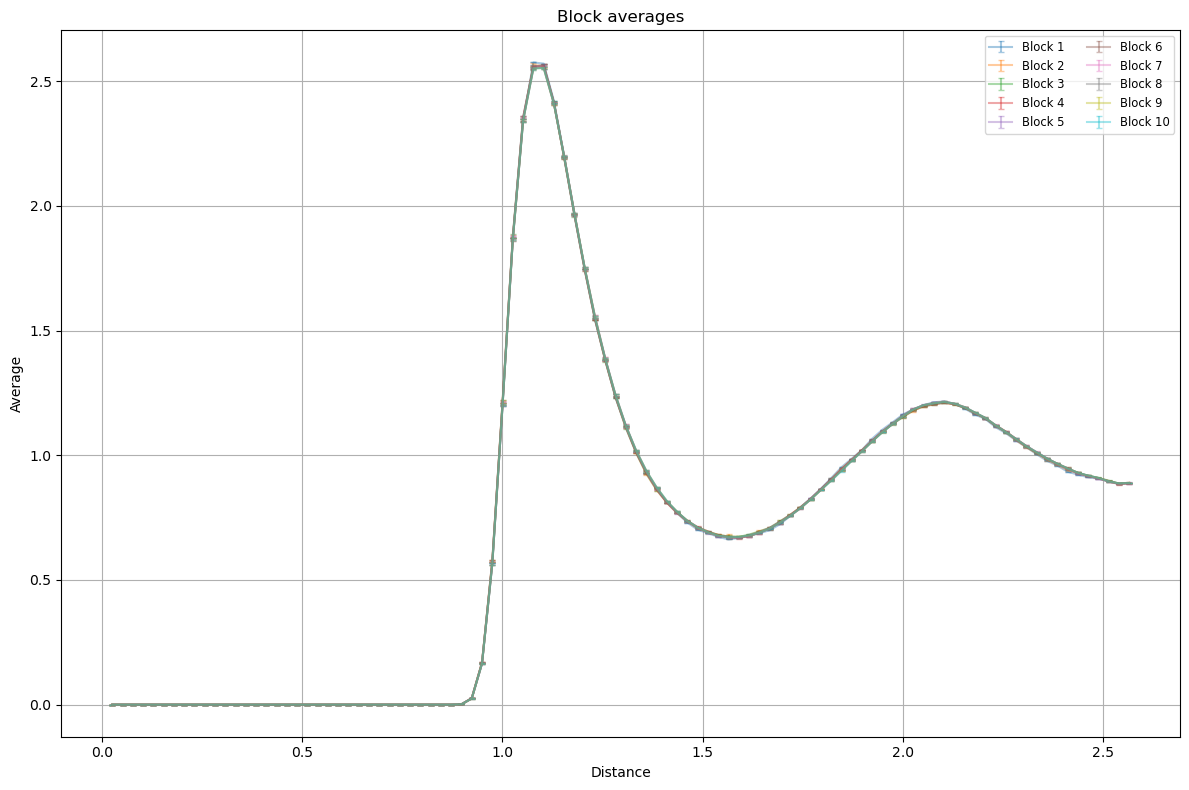

In [33]:
plt.figure(figsize=(12, 8))

for i, h in enumerate(histograms):
    plt.errorbar(
        h['DISTANCE'], h['AVE_GOFR'], yerr=h['ERROR'],
        fmt='-', capsize=2, alpha=0.4, label=f'Block {i+1}'
    )

plt.xlabel('Distance')
plt.ylabel('Average')
plt.title('Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

In [14]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr_blockave.csv"
with open (file) as f:
    bin_size = f.readline()
    print(bin_size)

BIN SIZE	0.0256496



In [15]:
file= "/home/elisa/Scrivania/LSN/LSN/nsl_simulator/NSL_SIMULATOR/OUTPUT/gofr_blockave.csv"
dfa = pd.read_csv(file,sep ="\t", skiprows=1,skip_blank_lines = False)
dfa.head()

,BIN,DISTANCE,AVE_GOFR
0,0.0,0.025650,0.0
1,1.0,0.051299,0.0
2,2.0,0.076949,0.0
3,3.0,0.102599,0.0
4,4.0,0.128248,0.0


In [16]:
T=1.1

nan_rows = dfa[dfa.isnull().all(axis=1)].index

# Add start/end points for slicing
split_points = [-1] + list(nan_rows) + [len(dfa)]

# Slice the DataFrame into blocks
histograms1 = []
for i in range(len(split_points) - 1):
    start = split_points[i] + 1
    end = split_points[i + 1]
    block = dfa.iloc[start:end].reset_index(drop=True)
    if not block.empty:
        histograms1.append(block)

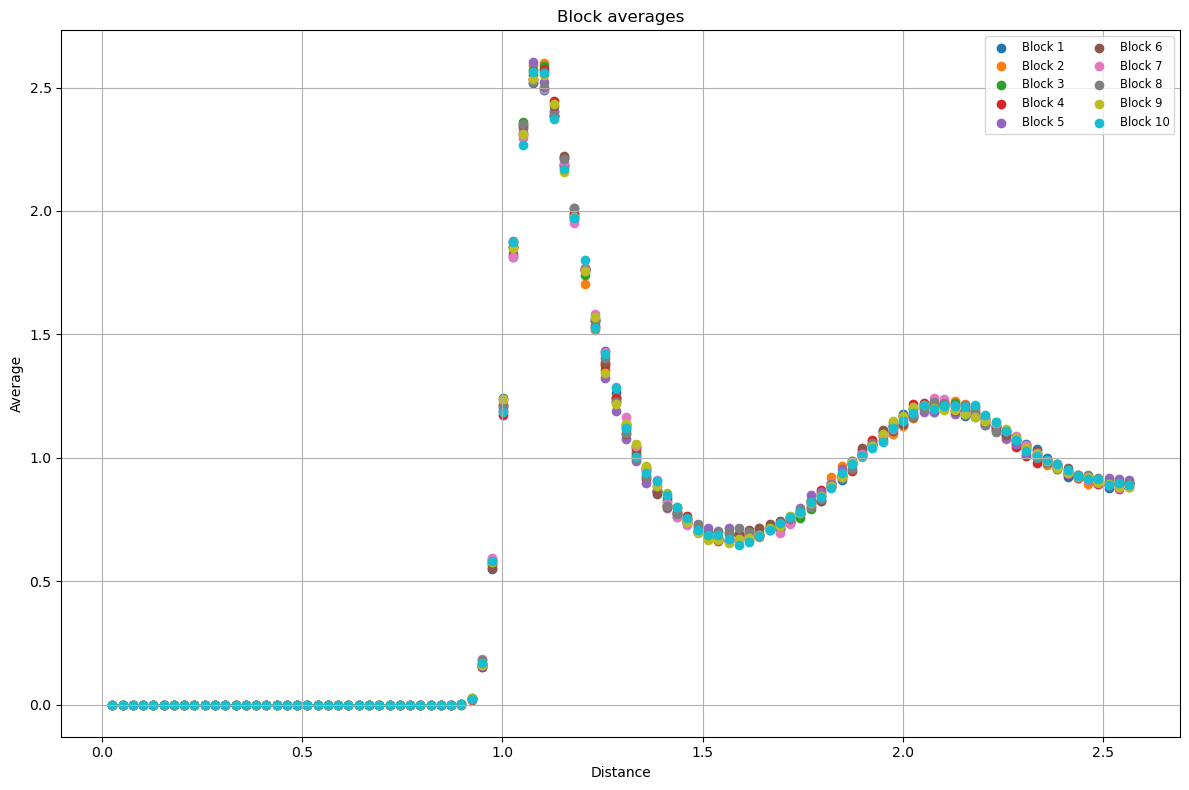

In [17]:
plt.figure(figsize=(12, 8))

for i, h in enumerate(histograms1):
    plt.scatter(
        h['DISTANCE'], h['AVE_GOFR'], label=f'Block {i+1}')

plt.xlabel('Distance')
plt.ylabel('Average')
plt.title('Block averages')
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()